In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math


import scipy.stats as stats

In [2]:
customer=pd.read_excel(r"/CustomersData.xlsx")
customer

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [3]:
discount=pd.read_csv(r"/Discount_Coupon.csv")
discount

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [4]:
marketting_spend=pd.read_csv(r"/Marketing_Spend.csv")
marketting_spend

,Date,Offline_Spend,Online_Spend
0,01/01/19,4500,2424.50
1,01/02/19,4500,3480.36
2,01/03/19,4500,1576.38
3,01/04/19,4500,2928.55
4,01/05/19,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [5]:
marketting_spend.columns

Index(['Date', 'Offline_Spend', 'Online_Spend'], dtype='object')

In [6]:
tax_amount=pd.read_excel(r"/Tax_amount.xlsx")
tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [7]:
sales=pd.read_csv(r"/Online_Sales.csv")
sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [8]:
import datetime

In [9]:
sales['Transaction_Date']=pd.to_datetime(sales.Transaction_Date.astype(str))

In [10]:
sales['Transaction_Date']=pd.to_datetime(sales['Transaction_Date']).dt.strftime('%d-%m-%Y')

In [11]:
sales.tail(20)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
52904,12956,48480,31-12-2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Clicked
52905,12956,48481,31-12-2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Clicked
52906,12956,48482,31-12-2019,GGOEGAEJ028116,Google Women's Short Sleeve Badge Tee Grey,Apparel,4,3.47,6.50,Clicked
52907,12956,48482,31-12-2019,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.50,Used
52908,12956,48483,31-12-2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Clicked
52909,15781,48485,31-12-2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,151.88,6.50,Clicked
52910,15781,48488,31-12-2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52911,15781,48489,31-12-2019,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.50,Used
52912,15781,48489,31-12-2019,GGOEGAXB089228,Google Trike Tee Black,Apparel,1,16.30,6.50,Used
52913,15781,48489,31-12-2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,2,80.52,6.50,Clicked


In [ ]:
sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

# Merging of Datasets

In [12]:
df=pd.merge(left=sales, right= customer, how="left", on="CustomerID")
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months
0,17850,16679,01-01-2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12
1,17850,16680,01-01-2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,12
2,17850,16681,01-01-2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,M,Chicago,12
3,17850,16682,01-01-2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,M,Chicago,12
4,17850,16682,01-01-2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,31-12-2019,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,F,New York,45
52920,14410,48494,31-12-2019,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,F,New York,45
52921,14410,48495,31-12-2019,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,F,New York,45
52922,14600,48496,31-12-2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,F,California,7


In [13]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')

In [14]:
discount.rename(columns={'Product_Category ':'Product_Category'},inplace=True)

In [15]:
discount.columns

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [16]:
df=pd.merge(left=df, right=discount, how="left", on="Product_Category")

In [17]:
df['Transaction_Date']=pd.to_datetime(df.Transaction_Date.astype(str))

In [18]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Feb,ELEC20,20.0
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Mar,ELEC30,30.0
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Apr,ELEC10,10.0
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,May,ELEC20,20.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630688 non-null  int64         
 1   Transaction_ID       630688 non-null  int64         
 2   Transaction_Date     630688 non-null  datetime64[ns]
 3   Product_SKU          630688 non-null  object        
 4   Product_Description  630688 non-null  object        
 5   Product_Category     630688 non-null  object        
 6   Quantity             630688 non-null  int64         
 7   Avg_Price            630688 non-null  float64       
 8   Delivery_Charges     630688 non-null  float64       
 9   Coupon_Status        630688 non-null  object        
 10  Gender               630688 non-null  object        
 11  Location             630688 non-null  object        
 12  Tenure_Months        630688 non-null  int64         
 13  Month         

In [20]:
marketting_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [21]:
marketting_spend['Date']=pd.to_datetime(marketting_spend.Date.astype(str))

In [22]:
marketting_spend.head()

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [23]:
marketting_spend.rename(columns={'Date':'Transaction_Date'},inplace=True)

In [24]:
marketting_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_Date  365 non-null    datetime64[ns]
 1   Offline_Spend     365 non-null    int64         
 2   Online_Spend      365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [25]:
tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [26]:
df=pd.merge(left=df, right=marketting_spend, how="left", on="Transaction_Date")

In [27]:
df=pd.merge(left=df, right=tax_amount, how="left", on="Product_Category")

In [28]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630688 non-null  int64         
 1   Transaction_ID       630688 non-null  int64         
 2   Transaction_Date     630688 non-null  datetime64[ns]
 3   Product_SKU          630688 non-null  object        
 4   Product_Description  630688 non-null  object        
 5   Product_Category     630688 non-null  object        
 6   Quantity             630688 non-null  int64         
 7   Avg_Price            630688 non-null  float64       
 8   Delivery_Charges     630688 non-null  float64       
 9   Coupon_Status        630688 non-null  object        
 10  Gender               630688 non-null  object        
 11  Location             630688 non-null  object        
 12  Tenure_Months        630688 non-null  int64         
 13  Month         

# 1. Invoice Amount for each transcation and Item Level



In [ ]:
#Invoice Value=((Quantity*Avg_price))*(1-Discount_pct)*(1+GST))+Delivery Charges

In [30]:
df['Invoice']=(((df.Quantity)*(df.Avg_Price))*(1-df['Discount_pct'])*(1+df.GST))+df['Delivery_Charges']

In [31]:
df['Invoice']

0         -1515.229
1         -3206.039
2         -4896.849
3         -1515.229
4         -3206.039
            ...    
630683    -6711.482
630684   -10254.362
630685    -3168.602
630686    -6711.482
630687   -10254.362
Name: Invoice, Length: 630688, dtype: float64

#2. Detailed EDA on Business Objectives

## a) how many customers acquired every month

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630688 non-null  int64         
 1   Transaction_ID       630688 non-null  int64         
 2   Transaction_Date     630688 non-null  datetime64[ns]
 3   Product_SKU          630688 non-null  object        
 4   Product_Description  630688 non-null  object        
 5   Product_Category     630688 non-null  object        
 6   Quantity             630688 non-null  int64         
 7   Avg_Price            630688 non-null  float64       
 8   Delivery_Charges     630688 non-null  float64       
 9   Coupon_Status        630688 non-null  object        
 10  Gender               630688 non-null  object        
 11  Location             630688 non-null  object        
 12  Tenure_Months        630688 non-null  int64         
 13  Month         

In [33]:
df.isnull().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Gender                   0
Location                 0
Tenure_Months            0
Month                  400
Coupon_Code            400
Discount_pct           400
Offline_Spend            0
Online_Spend             0
GST                      0
Invoice                400
dtype: int64

In [34]:
df['Cust_Transaction_Date']=df['Transaction_Date']

In [35]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Location,Tenure_Months,Month,Coupon_Code,Discount_pct,Offline_Spend,Online_Spend,GST,Invoice,Cust_Transaction_Date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,Jan,ELEC10,10.0,4500,2424.5,0.1,-1515.229,2019-01-01
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,Feb,ELEC20,20.0,4500,2424.5,0.1,-3206.039,2019-01-01
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,Mar,ELEC30,30.0,4500,2424.5,0.1,-4896.849,2019-01-01
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,Apr,ELEC10,10.0,4500,2424.5,0.1,-1515.229,2019-01-01
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Chicago,12,May,ELEC20,20.0,4500,2424.5,0.1,-3206.039,2019-01-01


In [ ]:
# for each customer , find the oldest transcation date,
# create user_type column (if , the customer's transcation date is exceeding the oldest transcation date, then it
#is an existing customer)

In [36]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date'],
      dtype='object')

In [37]:
new_df=df.groupby(['CustomerID',"Transaction_Date"])[["Cust_Transaction_Date"]].min().reset_index()
new_df

,CustomerID,Transaction_Date,Cust_Transaction_Date
0,12346,2019-09-15,2019-09-15
1,12347,2019-01-11,2019-01-11
2,12347,2019-02-11,2019-02-11
3,12347,2019-03-24,2019-03-24
4,12348,2019-06-22,2019-06-22
...,...,...,...
3203,18269,2019-05-04,2019-05-04
3204,18269,2019-06-20,2019-06-20
3205,18277,2019-10-23,2019-10-23
3206,18283,2019-07-29,2019-07-29


In [38]:
new_df=new_df.rename(columns={"Transaction_Date":"oldest_cust_tran_dt"})
new_df

,CustomerID,oldest_cust_tran_dt,Cust_Transaction_Date
0,12346,2019-09-15,2019-09-15
1,12347,2019-01-11,2019-01-11
2,12347,2019-02-11,2019-02-11
3,12347,2019-03-24,2019-03-24
4,12348,2019-06-22,2019-06-22
...,...,...,...
3203,18269,2019-05-04,2019-05-04
3204,18269,2019-06-20,2019-06-20
3205,18277,2019-10-23,2019-10-23
3206,18283,2019-07-29,2019-07-29


In [39]:
new_df['user_type']=np.where(new_df['Cust_Transaction_Date']>(new_df["oldest_cust_tran_dt"]),"existing customer","new customer")

In [40]:
df1=pd.merge(left=df, right= new_df, on=["CustomerID", "Cust_Transaction_Date"],how="left")

In [41]:
df1.user_type.value_counts()

new customer    630688
Name: user_type, dtype: int64

In [42]:
df1['Transaction_Date']=pd.to_datetime(df1.Transaction_Date.astype(str))

#df1['Transaction_Date']=pd.to_datetime(df1['Transaction_Date']).dt.strftime('%d-%m-%Y')

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CustomerID             630688 non-null  int64         
 1   Transaction_ID         630688 non-null  int64         
 2   Transaction_Date       630688 non-null  datetime64[ns]
 3   Product_SKU            630688 non-null  object        
 4   Product_Description    630688 non-null  object        
 5   Product_Category       630688 non-null  object        
 6   Quantity               630688 non-null  int64         
 7   Avg_Price              630688 non-null  float64       
 8   Delivery_Charges       630688 non-null  float64       
 9   Coupon_Status          630688 non-null  object        
 10  Gender                 630688 non-null  object        
 11  Location               630688 non-null  object        
 12  Tenure_Months          630688 non-null  int6

In [44]:
df1['cust_purchase_month']=df1['Transaction_Date'].dt.month_name()
df1['cust_purchase_week']=df1['Transaction_Date'].dt.week
df1['cust_purchase_day']=df1['Transaction_Date'].dt.day

<ipython-input-44-8e478666411a>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['cust_purchase_week']=df1['Transaction_Date'].dt.week


In [45]:
df1.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Offline_Spend,Online_Spend,GST,Invoice,Cust_Transaction_Date,oldest_cust_tran_dt,user_type,cust_purchase_month,cust_purchase_week,cust_purchase_day
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,4500,2424.5,0.1,-1515.229,2019-01-01,2019-01-01,new customer,January,1,1
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,4500,2424.5,0.1,-3206.039,2019-01-01,2019-01-01,new customer,January,1,1
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,4500,2424.5,0.1,-4896.849,2019-01-01,2019-01-01,new customer,January,1,1
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,4500,2424.5,0.1,-1515.229,2019-01-01,2019-01-01,new customer,January,1,1
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,4500,2424.5,0.1,-3206.039,2019-01-01,2019-01-01,new customer,January,1,1


In [46]:
df1["num_user_type"]=np.where(df1["user_type"]=="new customer",1,0)

In [47]:
df1.groupby(["cust_purchase_month"])[["num_user_type"]].sum().reset_index()

,cust_purchase_month,num_user_type
0,April,50355
1,August,62299
2,December,50943
3,February,42765
4,January,49796
5,July,65854
6,June,53023
7,March,53463
8,May,51316
9,November,53335


These are the number of customers acquired every month and all are new customers

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type'],
      dtype='object')

## b)Understanding the retention of customers on month and month basis

In [48]:
retention=pd.crosstab(index=df1["cust_purchase_month"],columns=['cust_purchase_month'], values=df1["CustomerID"], aggfunc='count').fillna(0)
retention

col_0,cust_purchase_month
cust_purchase_month,
April,50355
August,62299
December,50943
February,42765
January,49796
July,65854
June,53023
March,53463
May,51316


## c).How does Revenue from existing/new customers vary month on month basis

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type'],
      dtype='object')

In [49]:
df1['Total_Revenue']=df1['Quantity']*df1['Avg_Price']

In [50]:
df1.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Invoice,Cust_Transaction_Date,oldest_cust_tran_dt,user_type,cust_purchase_month,cust_purchase_week,cust_purchase_day,num_user_type,Total_Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,-1515.229,2019-01-01,2019-01-01,new customer,January,1,1,1,153.71
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,-3206.039,2019-01-01,2019-01-01,new customer,January,1,1,1,153.71
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,-4896.849,2019-01-01,2019-01-01,new customer,January,1,1,1,153.71
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,-1515.229,2019-01-01,2019-01-01,new customer,January,1,1,1,153.71
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.1,-3206.039,2019-01-01,2019-01-01,new customer,January,1,1,1,153.71


In [51]:
revenue=pd.crosstab(index=df1["cust_purchase_month"], columns=df1["user_type"], values=df1["Total_Revenue"], aggfunc='sum').fillna(0)
revenue

user_type,new customer
cust_purchase_month,
April,4534899.35
August,4324381.17
December,5325029.61
February,3973117.21
January,4631901.99
July,4889262.42
June,4328708.76
March,4376324.62
May,4347486.31


This is the revenue month on month basis for all new customers since there are no existing customers.

## d).How does discount play role in the revenue?

In [52]:
import seaborn as sns
from scipy.stats import pearsonr

In [53]:
df1["Discount_pct"].value_counts()

10.0    210096
20.0    210096
30.0    210096
Name: Discount_pct, dtype: int64

In [54]:
df1["Discount_pct"].isnull().sum()

400

In [55]:
df1["Discount_pct"]=df1["Discount_pct"].fillna(df1["Discount_pct"].mode()[0])

In [ ]:
# To understand if there is any impact of discount pct on revenue
#H0  : mean discount_pct 1 == mean discount_pct 2 == mean discount_pct 3
#H1  : mean discount_pct 1 <> mean discount_pct 2 <> mean discount_pct 3
  #  (age is influencing the claims)

In [56]:
df1.groupby(['Discount_pct'])[['Total_Revenue']].count()

,Total_Revenue
Discount_pct,
10.0,210496
20.0,210096
30.0,210096


In [57]:
s1 = df1.Total_Revenue.loc[df1.Discount_pct==10]
s2 = df1.Total_Revenue.loc[df1.Discount_pct==20]
s3 = df1.Total_Revenue.loc[df1.Discount_pct==30]

# Perform the ANOVA
aov = stats.f_oneway(s1, s2, s3)

In [58]:
# Statistic :  F Value
print("The f-value is {} and the p value is {}".format(aov.statistic,aov.pvalue))

The f-value is 0.0039414538033876395 and the p value is 0.996066303535412


In [59]:
print(s1.mean()); print(s2.mean()); print(s3.mean())

88.37066305297961
88.40959351915313
88.40959351915313


There is not much correlation between discount and revenue. Revenue stays consistent with increase or decrease in 
Discount. So it does not play much role

## f). Analyse KPIs like Revenue, no. of orders, average order value, number of customers, (existing/new), quantity by category, by month, by week, by day

In [60]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue'],
      dtype='object')

In [61]:
df1.shape

(630688, 28)

##g). Average Order Value

In [ ]:
#Average Order Value=Revenue/Transaction Per Customer

In [ ]:
cust=df1[['CustomerID', 'Transaction_ID','Avg_Price']]

In [62]:
# This is the total no. of transactions per customer
cust.CustomerID.nunique()

NameError: ignored

In [63]:
#Average order value= df.Avg_Price/1468 ?

df.Avg_Price/1468

0         0.104707
1         0.104707
2         0.104707
3         0.104707
4         0.104707
            ...   
630683    0.054850
630684    0.054850
630685    0.054850
630686    0.054850
630687    0.054850
Name: Avg_Price, Length: 630688, dtype: float64

 ## h).Quantity by Category


In [64]:
df1.groupby(['Product_Category'])[['Quantity']].count().reset_index()

,Product_Category,Quantity
0,Accessories,2808
1,Android,516
2,Apparel,217512
3,Backpacks,89
4,Bags,22584
5,Bottles,3216
6,Drinkware,41796
7,Fun,160
8,Gift Cards,1908
9,Google,105


## i). Quantity by Month and Week

In [ ]:
df1.groupby(['cust_purchase_month','cust_purchase_week'])[['Quantity']].count().reset_index()

,cust_purchase_month,cust_purchase_week,Quantity
0,April,14,11231
1,April,15,13314
2,April,16,13046
3,April,17,10652
4,April,18,2112
...,...,...,...
57,September,36,11290
58,September,37,11486
59,September,38,10803
60,September,39,12206


## j). No. of Customers

Total number of customers are the unqiue customers

In [ ]:
df1.CustomerID.nunique()

1468

## k). Quantity by Month and Day

In [ ]:
df1.groupby(['cust_purchase_month','cust_purchase_day'])[['Quantity']].count().reset_index()

,cust_purchase_month,cust_purchase_day,Quantity
0,April,1,1995
1,April,2,984
2,April,3,3025
3,April,4,1658
4,April,5,1984
...,...,...,...
360,September,26,2412
361,September,27,2400
362,September,28,1946
363,September,29,1536


In [ ]:
df1.cust_purchase_month.value_counts()

July         65854
August       62299
March        53463
November     53335
June         53023
May          51316
December     50943
April        50355
January      49796
September    49580
October      47959
February     42765
Name: cust_purchase_month, dtype: int64

## l). Understand the trends/seasonality of sales by category, location, month, etc

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue'],
      dtype='object')

In [ ]:
month_dic={'January':1,'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8,'September':9,
       'October':10,'November':11, 'December':12}

In [ ]:
df1=df1.sort_values('cust_purchase_month', key=lambda x: x.apply(lambda x: month_dic[x]))

In [ ]:
import plotly.express as px

In [ ]:
trend=df1.groupby(['cust_purchase_month'])[['Avg_Price']].sum().reset_index().sort_values('cust_purchase_month', key=lambda x: x.apply(lambda x: month_dic[x]))
trend

,cust_purchase_month,Avg_Price
4,January,2897834.68
3,February,2170845.00
7,March,2484858.08
0,April,2415941.18
8,May,2312006.18
6,June,2535634.04
5,July,2595558.36
1,August,2513836.18
11,September,2710486.80
10,October,2821257.41


In [ ]:
#df = px.data.gapminder().query("continent == 'Oceania'")
fig = px.line(trend, x="cust_purchase_month", y="Avg_Price",markers=True)
fig.show()

In [ ]:
trend2=df1.groupby(['cust_purchase_month','Location'])[['Avg_Price']].sum().reset_index().sort_values('cust_purchase_month', key=lambda x: x.apply(lambda x: month_dic[x]))
trend2

,cust_purchase_month,Location,Avg_Price
24,January,Washington DC,246419.46
23,January,New York,517452.67
22,January,New Jersey,275026.67
21,January,Chicago,908322.97
20,January,California,950612.91
19,February,Washington DC,106274.92
18,February,New York,315046.42
17,February,New Jersey,176715.58
16,February,Chicago,860912.50
15,February,California,711895.58


In [ ]:
fig1 = px.line(trend2, x="cust_purchase_month", y="Avg_Price",color='Location',markers=True)
fig1.show()

In [ ]:
trend3=df1.groupby(['cust_purchase_month','Product_Category'])[['Avg_Price']].sum().reset_index().sort_values('cust_purchase_month', key=lambda x: x.apply(lambda x: month_dic[x]))
trend3

,cust_purchase_month,Product_Category,Avg_Price
85,January,Gift Cards,4800.00
78,January,Android,835.32
79,January,Apparel,372694.80
80,January,Backpacks,445.01
81,January,Bags,41847.12
...,...,...,...
41,December,Backpacks,359.96
39,December,Android,191.88
38,December,Accessories,1562.04
48,December,Headgear,10354.44


In [ ]:
fig2 = px.line(trend3, x="cust_purchase_month", y="Avg_Price",color='Product_Category',markers=True)
fig2.show()

## m).How number order varies and sales with different days?

In [ ]:
trend4=df1.groupby(['Transaction_ID','cust_purchase_day'])[['Total_Revenue']].mean().reset_index().sort_values('cust_purchase_day')
trend4

,Transaction_ID,cust_purchase_day,Total_Revenue
0,16679,1,153.7100
548,17385,1,122.7700
549,17386,1,4.3275
550,17388,1,153.7100
551,17389,1,245.5400
...,...,...,...
15985,37108,31,44.1000
15984,37107,31,149.0000
15983,37106,31,199.0000
15981,37104,31,119.0000


In [ ]:
avg_revenue=trend4.groupby(['cust_purchase_day'])[['Total_Revenue']].mean().reset_index().sort_values('cust_purchase_day')

In [ ]:
fig3 = px.line(avg_revenue, x="cust_purchase_day", y="Total_Revenue",markers=True)
fig3.show()

## n).Calculate the Revenue , Marketing spend, percentage of marketing spend out of revenue, Tax, percentage, of delivery charges, by month

In [65]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct',
       'Offline_Spend', 'Online_Spend', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue'],
      dtype='object')

In [ ]:
#% of marketing spend will be offline spend+online spend/avg_price*100

#marketting spend=offline spend+ online Spend

#tax percentage= GST/delivery charges*100

In [66]:
df1['marketing_spend']=df1['Offline_Spend']+df1['Online_Spend']

In [67]:
df1['marketing_per_spend']=df1['marketing_spend']/df1['Total_Revenue']*100
df1['tax_percentage']=df1['GST']/df1['Delivery_Charges']*100

In [68]:
df1.drop(['Offline_Spend','Online_Spend'],axis=1, inplace=True)

In [69]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice', 'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage'],
      dtype='object')

Month Wise KPIs-Average Values

In [70]:
df1.pivot_table(index=['cust_purchase_month'],values=['marketing_spend','marketing_per_spend','tax_percentage','Total_Revenue'],aggfunc ='mean')

,Total_Revenue,marketing_per_spend,marketing_spend
cust_purchase_month,,,
April,90.058571,38972.441346,5224.655475
August,69.413332,45447.580770,4699.307136
December,104.529172,40183.097781,6484.160879
February,92.905816,37459.862533,4926.269856
January,93.017551,37610.809586,5057.552702
July,74.243970,37276.041519,3945.431944
June,81.638322,37400.626454,4482.258929
March,81.857072,29890.057080,3974.476071
May,84.719898,30878.229444,3858.398678


## m). How marketing spend is impacting revenue?

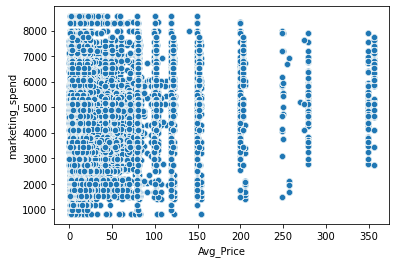

In [71]:
sns.scatterplot(x = "Avg_Price", y = "marketing_spend",data = df1)

In [72]:
pearsonr(df1["Avg_Price"], df1["marketing_spend"])

(0.06137313594244556, 0.0)

As we can se there is minimal correlation between Avg Price and Marketing spend
indicating that marketing spend isnt impacting revenue that much.

## n). Which product has appeared in the transactions?

In [ ]:
df1.groupby(['Product_Category'])[['Transaction_ID']].count().sort_values(by=['Transaction_ID'],ascending=False).reset_index()

,Product_Category,Transaction_ID
0,Apparel,217512
1,Nest-USA,168156
2,Office,78156
3,Drinkware,41796
4,Lifestyle,37104
5,Nest,26376
6,Bags,22584
7,Headgear,9252
8,Notebooks & Journals,8988
9,Waze,6648


Apparel has appeared the most in the Transactions

## 0).Which product was purchased mostly based on quantity?

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice', 'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage'],
      dtype='object')

In [ ]:
df1.groupby(['Product_Category'])[['Quantity']].sum().reset_index()

,Product_Category,Quantity
0,Accessories,13164
1,Android,540
2,Apparel,389256
3,Backpacks,113
4,Bags,183276
5,Bottles,25080
6,Drinkware,366012
7,Fun,834
8,Gift Cards,2472
9,Google,575


Accessories was purchased the most by Quantity

# 3. Performing Customer Segmentation

Heuritic: Divide the customers into Premimum, Gold, Silver, Standard Customers
and define strategy on the same

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice', 'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage'],
      dtype='object')

In [ ]:
df1.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,oldest_cust_tran_dt,user_type,cust_purchase_month,cust_purchase_week,cust_purchase_day,num_user_type,Total_Revenue,marketing_spend,marketing_per_spend,tax_percentage
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,2019-01-01,new customer,January,1,1,1,153.71,6924.50,4504.911847,1.538462
37625,17581,18841,2019-01-25,GGOEGAFB035816,Google Men's Zip Hoodie,Apparel,1,57.76,50.00,Used,...,2019-01-25,new customer,January,4,25,1,57.76,2124.95,3678.930055,0.360000
37626,17581,18841,2019-01-25,GGOEGAFB035816,Google Men's Zip Hoodie,Apparel,1,57.76,50.00,Used,...,2019-01-25,new customer,January,4,25,1,57.76,2124.95,3678.930055,0.360000
37627,17581,18842,2019-01-25,GGOEADHH073999,Android 17oz Stainless Steel Sport Bottle,Drinkware,5,15.67,13.78,Clicked,...,2019-01-25,new customer,January,4,25,1,78.35,2124.95,2712.125080,1.306241
37628,17581,18842,2019-01-25,GGOEADHH073999,Android 17oz Stainless Steel Sport Bottle,Drinkware,5,15.67,13.78,Clicked,...,2019-01-25,new customer,January,4,25,1,78.35,2124.95,2712.125080,1.306241


In [ ]:
df1.Transaction_Date.describe()

<ipython-input-72-a2c7c6e96693>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1.Transaction_Date.describe()


count                  630688
unique                    365
top       2019-11-27 00:00:00
freq                     4020
first     2019-01-01 00:00:00
last      2019-12-31 00:00:00
Name: Transaction_Date, dtype: object

In [ ]:
import datetime as dt

In [ ]:
PRESENT = dt.datetime(2019,12,31)

Recency: No. of days from last purchase

Frequency: How often did this customer make a purchase in a given period?/is basically the number of transactions from the last day of Purchase


Monetary: Total Money the customer spent

In [ ]:
rfm=df1.groupby('CustomerID').agg({'Transaction_Date': lambda date: (PRESENT - date.max()).days,
                                        'Transaction_ID': lambda num: len(num),
                                        'Avg_Price': lambda price: price.sum()})

In [ ]:
rfm.columns=['Recency','Frequency','Monetary']

In [ ]:
rfm['Recency'] = rfm['Recency'].astype(int)
rfm=rfm.sort_values(by=["Monetary"], ascending=False).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,12748,88,8197,371277.59
1,15311,12,7000,355328.02
2,14911,10,6210,354885.71
3,14606,0,6845,354201.32
4,17841,17,6809,330217.96
...,...,...,...,...
1463,15070,346,12,23.88
1464,16593,236,12,19.08
1465,13748,364,12,14.88
1466,12875,209,12,14.40


In [ ]:
rfm.isnull().sum()

CustomerID    0
Recency       0
Frequency     0
Monetary      0
dtype: int64

In [ ]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000,1468.000000
mean,15314.386240,142.576294,429.623978,22517.891941
std,1744.000367,102.237739,605.270668,32325.012918
min,12346.000000,0.000000,12.000000,12.000000
25%,13830.500000,50.000000,120.000000,4890.150000
50%,15300.000000,129.000000,252.000000,12654.480000
75%,16882.250000,221.000000,541.250000,29357.377500
max,18283.000000,364.000000,8197.000000,371277.590000


In [ ]:
rfm.Monetary.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1     1157.004
0.2     3595.440
0.3     6207.984
0.4     9080.064
0.5    12654.480
0.6    17437.368
0.7    24356.412
0.8    35441.448
0.9    51439.740
Name: Monetary, dtype: float64

Cutting into 10 Quantiles

In [ ]:
pd.qcut(rfm.Monetary, q =10)

0       (51439.74, 371277.59]
1       (51439.74, 371277.59]
2       (51439.74, 371277.59]
3       (51439.74, 371277.59]
4       (51439.74, 371277.59]
                ...          
1463       (11.999, 1157.004]
1464       (11.999, 1157.004]
1465       (11.999, 1157.004]
1466       (11.999, 1157.004]
1467       (11.999, 1157.004]
Name: Monetary, Length: 1468, dtype: category
Categories (10, interval[float64, right]): [(11.999, 1157.004] < (1157.004, 3595.44] <
                                            (3595.44, 6207.984] < (6207.984, 9080.064] < ... <
                                            (17437.368, 24356.412] < (24356.412, 35441.448] <
                                            (35441.448, 51439.74] < (51439.74, 371277.59]]

In [ ]:
rfm['seg'] = pd.qcut(rfm.Monetary, q =10, labels=False)

In [ ]:
#rfm.drop('CustomerID',axis=1,inplace=True)

In [ ]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'seg'], dtype='object')

In [ ]:
rfm[['CustomerID', 'Recency', 'Monetary', 'Frequency',
       'seg']].groupby('seg').mean().T

seg,0,1,2,3,4,5,6,7,8,9
CustomerID,15371.761905,15067.108844,15262.727891,15364.383562,15346.394558,15251.598639,15334.527397,15111.034014,15603.761905,15431.040816
Recency,177.319728,162.272109,161.823129,161.664384,155.170068,140.367347,138.123288,124.884354,119.843537,84.394558
Monetary,409.379184,2333.254150,4919.345374,7528.558904,10746.737687,14820.644626,20505.642671,29549.302517,42714.149252,91536.248027
Frequency,36.183673,87.836735,143.700680,174.321918,232.666667,300.374150,407.178082,552.054422,769.020408,1591.013605


In [ ]:
rfm[['Monetary', 'seg']].groupby('seg').sum()/np.sum((rfm[['Monetary', 'seg']].groupby('seg').sum()))

,Monetary
seg,
0,0.001820
1,0.010376
2,0.021876
3,0.033251
4,0.047790
5,0.065907
6,0.090568
7,0.131405
8,0.189948


In [ ]:
#RFM Segmentation

quantiles = rfm[['Frequency','Monetary','Recency' ]].quantile(q=[0.33,0.67])
quantiles

,Frequency,Monetary,Recency
0.33,156.0,6821.0280,72.0
0.67,420.0,21459.0411,189.0


In [ ]:
rfm['r_seg'] = np.where(rfm.Recency<=72, 'Active', np.where(rfm.Recency<=189, 'At Risk', 'Churn'))
rfm['m_seg'] = np.where(rfm.Monetary<=6821, 1, np.where(rfm.Monetary<=21459, 2, 3))
rfm['f_seg'] = np.where(rfm.Frequency<=156, 1, np.where(rfm.Frequency>=420, 2, 3))

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg
0,12748,88,8197,371277.59,9,At Risk,3,2
1,15311,12,7000,355328.02,9,Active,3,2
2,14911,10,6210,354885.71,9,Active,3,2
3,14606,0,6845,354201.32,9,Active,3,2
4,17841,17,6809,330217.96,9,Active,3,2
...,...,...,...,...,...,...,...,...
1463,15070,346,12,23.88,0,Churn,1,1
1464,16593,236,12,19.08,0,Churn,1,1
1465,13748,364,12,14.88,0,Churn,1,1
1466,12875,209,12,14.40,0,Churn,1,1


In [ ]:
rfm['fm_seg'] = np.where(((rfm.f_seg == 3) & (rfm.m_seg ==3)) , 'Platinum',
                          np.where((((rfm.f_seg == 3) & (rfm.m_seg ==2)) | ((rfm.f_seg == 2) & (rfm.m_seg ==3))) , 'Gold',
                          np.where((((rfm.f_seg == 1) & (rfm.m_seg ==3)) | ((rfm.f_seg == 3) & (rfm.m_seg ==1)) | ((rfm.f_seg == 2) & (rfm.m_seg ==2))), 'Silver', 'Standard' )))

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg,fm_seg
0,12748,88,8197,371277.59,9,At Risk,3,2,Gold
1,15311,12,7000,355328.02,9,Active,3,2,Gold
2,14911,10,6210,354885.71,9,Active,3,2,Gold
3,14606,0,6845,354201.32,9,Active,3,2,Gold
4,17841,17,6809,330217.96,9,Active,3,2,Gold
...,...,...,...,...,...,...,...,...,...
1463,15070,346,12,23.88,0,Churn,1,1,Standard
1464,16593,236,12,19.08,0,Churn,1,1,Standard
1465,13748,364,12,14.88,0,Churn,1,1,Standard
1466,12875,209,12,14.40,0,Churn,1,1,Standard


In [ ]:
#Profiling
rfm[['Recency', 'Monetary', 'Frequency', 'r_seg', 'fm_seg']].groupby(['r_seg', 'fm_seg']).mean().T

r_seg            Active                                             At Risk  \
fm_seg             Gold   Platinum        Silver     Standard          Gold   
Recency       33.899642     27.725     39.704545    32.225806    123.731278   
Monetary   48786.308029  29296.869  11921.963864  5489.423145  34718.326476   
Frequency    854.268817    320.100    387.659091    84.709677    707.687225   

r_seg                                                     Churn                \
fm_seg         Platinum       Silver     Standard          Gold      Platinum   
Recency      128.937500   138.986111   130.846995    261.349754    272.764706   
Monetary   26502.024375  9673.572083  3838.250601  26928.033399  29519.902941   
Frequency    348.062500   344.319444    83.579235    511.098522    331.823529   

r_seg                                
fm_seg          Silver     Standard  
Recency     253.442623   275.935644  
Monetary   9840.700984  3936.902723  
Frequency   348.245902    74.480198

In [ ]:
rfm['rfm_seg'] = rfm.r_seg + '_' + rfm.fm_seg

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg,fm_seg,rfm_seg
0,12748,88,8197,371277.59,9,At Risk,3,2,Gold,At Risk_Gold
1,15311,12,7000,355328.02,9,Active,3,2,Gold,Active_Gold
2,14911,10,6210,354885.71,9,Active,3,2,Gold,Active_Gold
3,14606,0,6845,354201.32,9,Active,3,2,Gold,Active_Gold
4,17841,17,6809,330217.96,9,Active,3,2,Gold,Active_Gold


In [ ]:
rfm.rfm_seg.value_counts()

Active_Gold         279
At Risk_Gold        227
Churn_Gold          203
Churn_Standard      202
At Risk_Standard    183
Active_Standard     124
At Risk_Silver       72
Churn_Silver         61
Active_Silver        44
Active_Platinum      40
Churn_Platinum       17
At Risk_Platinum     16
Name: rfm_seg, dtype: int64

In [ ]:
df2=pd.merge(left=df1, right= rfm, how="left", on="CustomerID")
df2.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Customer_LV,Recency,Frequency,Monetary,seg,r_seg,m_seg,f_seg,fm_seg,rfm_seg
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,High Value,274,3520,244589.51,9,Churn,3,2,Gold,Churn_Gold
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,High Value,274,3520,244589.51,9,Churn,3,2,Gold,Churn_Gold
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,High Value,274,3520,244589.51,9,Churn,3,2,Gold,Churn_Gold
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,High Value,274,3520,244589.51,9,Churn,3,2,Gold,Churn_Gold
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,High Value,274,3520,244589.51,9,Churn,3,2,Gold,Churn_Gold


In [ ]:
df2.groupby(['rfm_seg','Coupon_Status'])[['CustomerID']].count().sort_values(by=['CustomerID'],ascending=False).reset_index()

,rfm_seg,Coupon_Status,CustomerID
0,Active_Gold,Clicked,122766
1,At Risk_Gold,Clicked,81501
2,Active_Gold,Used,79451
3,At Risk_Gold,Used,54354
4,Churn_Gold,Clicked,51997
5,Active_Gold,Not Used,36124
6,Churn_Gold,Used,35539
7,At Risk_Gold,Not Used,24790
8,Churn_Gold,Not Used,16217
9,At Risk_Silver,Clicked,12557


1. It is essential to focus on all Gold and Standard Customers as they are more in number and as we can see from the above table, the higher in number i.e at risk gold, churn standard, at risk standard etc have mostly clicked or used the discount coupons.However there are also customers such as At Risk Gold, Churn Gold and churn standard that have not used any Coupons. 

2. It is therefore important to understand why these customers are falling in these categories. Reasons could very well vary from product quality, to unsatified packaging or delivery. 

3. Either way its is important to lay emphasis on what is working for Gold Active Customers and if the  same strategy could be applied to churn or at risk customers. If not, a deeper dimension such as a cohort analysis could work to understand cohort customer behaviour.

## K-MEANS CLUSTERING

In [ ]:
df2.drop(['oldest_cust_tran_dt','cust_purchase_week', 'cust_purchase_day',
       'num_user_type','Cust_Transaction_Date','CustomerID','Transaction_ID'],axis=1,inplace=True)

In [ ]:
df2.drop(['Recency', 'Frequency','Monetary', 'seg', 'r_seg', 'm_seg', 'f_seg', 'fm_seg'],axis=1,inplace=True)

In [ ]:
df2.columns

Index(['Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Gender', 'Location', 'Tenure_Months', 'Month',
       'Coupon_Code', 'Discount_pct', 'GST', 'Invoice', 'user_type',
       'cust_purchase_month', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'rfm_seg'],
      dtype='object')

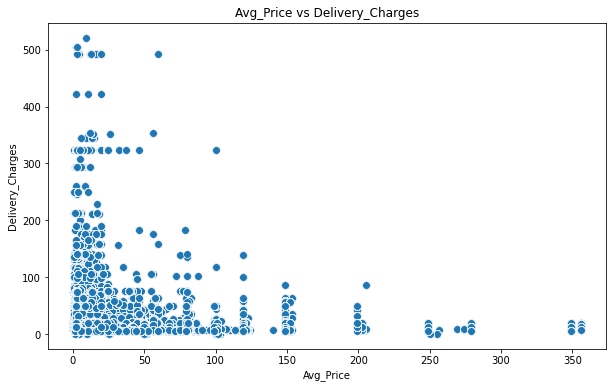

In [ ]:
X=df2[['Avg_Price','Delivery_Charges']]
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Avg_Price',y = 'Delivery_Charges',  data = X  ,s = 60 )
plt.xlabel('Avg_Price')
plt.ylabel('Delivery_Charges') 
plt.title('Avg_Price vs Delivery_Charges')
plt.show()

In [ ]:
df2.head()

,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,...,Discount_pct,GST,Invoice,user_type,cust_purchase_month,Total_Revenue,marketing_spend,marketing_per_spend,tax_percentage,rfm_seg
0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,M,Chicago,...,10.0,0.10,-1515.2290,new customer,January,153.71,6924.50,4504.911847,1.538462,Churn_Gold
1,2019-01-25,GGOEGAFB035816,Google Men's Zip Hoodie,Apparel,1,57.76,50.00,Used,M,California,...,20.0,0.18,-1244.9792,new customer,January,57.76,2124.95,3678.930055,0.360000,At Risk_Gold
2,2019-01-25,GGOEGAFB035816,Google Men's Zip Hoodie,Apparel,1,57.76,50.00,Used,M,California,...,30.0,0.18,-1926.5472,new customer,January,57.76,2124.95,3678.930055,0.360000,At Risk_Gold
3,2019-01-25,GGOEADHH073999,Android 17oz Stainless Steel Sport Bottle,Drinkware,5,15.67,13.78,Clicked,M,California,...,10.0,0.18,-818.2970,new customer,January,78.35,2124.95,2712.125080,1.306241,At Risk_Gold
4,2019-01-25,GGOEADHH073999,Android 17oz Stainless Steel Sport Bottle,Drinkware,5,15.67,13.78,Clicked,M,California,...,20.0,0.18,-1742.8270,new customer,January,78.35,2124.95,2712.125080,1.306241,At Risk_Gold


In [ ]:
dummies = pd.get_dummies(df2[['Gender','Product_Category','Location']])

In [ ]:
X=df2[['Avg_Price','Discount_pct','Quantity']]

In [ ]:
df3=pd.concat([X, dummies], axis=1)
df3.columns

Index(['Avg_Price', 'Discount_pct', 'Quantity', 'Gender_F', 'Gender_M',
       'Product_Category_Accessories', 'Product_Category_Android',
       'Product_Category_Apparel', 'Product_Category_Backpacks',
       'Product_Category_Bags', 'Product_Category_Bottles',
       'Product_Category_Drinkware', 'Product_Category_Fun',
       'Product_Category_Gift Cards', 'Product_Category_Google',
       'Product_Category_Headgear', 'Product_Category_Housewares',
       'Product_Category_Lifestyle', 'Product_Category_More Bags',
       'Product_Category_Nest', 'Product_Category_Nest-Canada',
       'Product_Category_Nest-USA', 'Product_Category_Notebooks & Journals',
       'Product_Category_Office', 'Product_Category_Waze',
       'Location_California', 'Location_Chicago', 'Location_New Jersey',
       'Location_New York', 'Location_Washington DC'],
      dtype='object')

In [ ]:
df3.isnull().sum()

Avg_Price                                0
Discount_pct                             0
Quantity                                 0
Gender_F                                 0
Gender_M                                 0
Product_Category_Accessories             0
Product_Category_Android                 0
Product_Category_Apparel                 0
Product_Category_Backpacks               0
Product_Category_Bags                    0
Product_Category_Bottles                 0
Product_Category_Drinkware               0
Product_Category_Fun                     0
Product_Category_Gift Cards              0
Product_Category_Google                  0
Product_Category_Headgear                0
Product_Category_Housewares              0
Product_Category_Lifestyle               0
Product_Category_More Bags               0
Product_Category_Nest                    0
Product_Category_Nest-Canada             0
Product_Category_Nest-USA                0
Product_Category_Notebooks & Journals    0
Product_Cat

In [ ]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

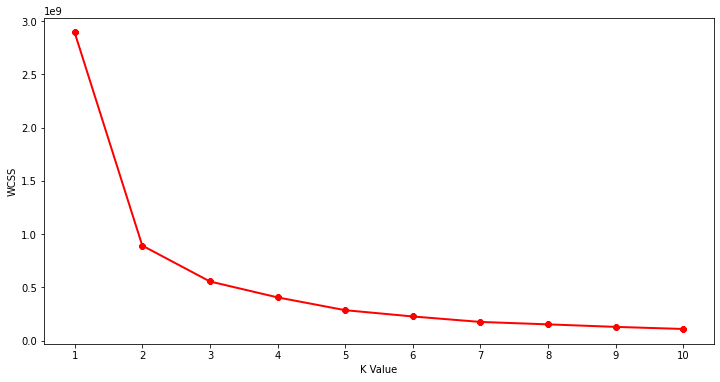

In [ ]:
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [ ]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=3)
y2 = km2.fit_predict(df3)
df3["label"] = y2
#The data with labels
df3.head()

,Avg_Price,Discount_pct,Quantity,Gender_F,Gender_M,Product_Category_Accessories,Product_Category_Android,Product_Category_Apparel,Product_Category_Backpacks,Product_Category_Bags,...,Product_Category_Nest-USA,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze,Location_California,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,label
0,153.71,10.0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1,57.76,20.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,57.76,30.0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15.67,10.0,5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,15.67,20.0,5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


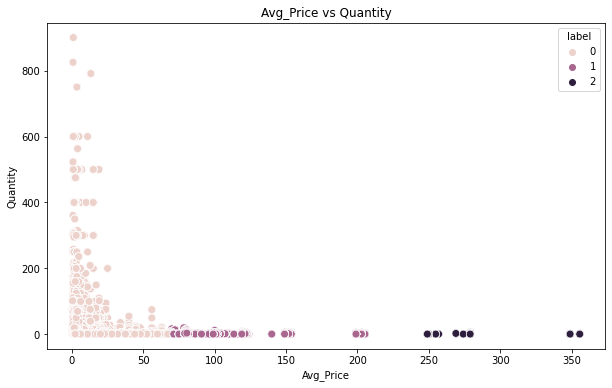

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Avg_Price',y = 'Quantity',hue="label",  
                  legend='full',data = df3  ,s = 60 )
plt.xlabel('Avg_Price')
plt.ylabel('Quantity') 
plt.title('Avg_Price vs Quantity')
plt.show()

# 4. Predicting Customer Lifetime Value (Low Value/Medium Value/High Value using customer revenue); Classification Model

In [73]:
df1.Total_Revenue.describe()

count    630688.000000
mean         88.396600
std         164.204188
min           0.400000
25%          11.960000
50%          30.390000
75%         121.300000
max       10512.390000
Name: Total_Revenue, dtype: float64

In [74]:
df1['Customer_LV']=np.where(df1['Total_Revenue']<15,'Low Value',np.where(df1['Total_Revenue']<100,'Medium Value','High Value'))

In [75]:
df1.Customer_LV.value_counts()

Medium Value    220082
High Value      208879
Low Value       201727
Name: Customer_LV, dtype: int64

In [76]:
df1.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,user_type,cust_purchase_month,cust_purchase_week,cust_purchase_day,num_user_type,Total_Revenue,marketing_spend,marketing_per_spend,tax_percentage,Customer_LV
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,new customer,January,1,1,1,153.71,6924.5,4504.911847,1.538462,High Value
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,new customer,January,1,1,1,153.71,6924.5,4504.911847,1.538462,High Value
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,new customer,January,1,1,1,153.71,6924.5,4504.911847,1.538462,High Value
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,new customer,January,1,1,1,153.71,6924.5,4504.911847,1.538462,High Value
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,new customer,January,1,1,1,153.71,6924.5,4504.911847,1.538462,High Value


In [77]:
df1.isnull().sum()

CustomerID                 0
Transaction_ID             0
Transaction_Date           0
Product_SKU                0
Product_Description        0
Product_Category           0
Quantity                   0
Avg_Price                  0
Delivery_Charges           0
Coupon_Status              0
Gender                     0
Location                   0
Tenure_Months              0
Month                    400
Coupon_Code              400
Discount_pct               0
GST                        0
Invoice                  400
Cust_Transaction_Date      0
oldest_cust_tran_dt        0
user_type                  0
cust_purchase_month        0
cust_purchase_week         0
cust_purchase_day          0
num_user_type              0
Total_Revenue              0
marketing_spend            0
marketing_per_spend        0
tax_percentage             0
Customer_LV                0
dtype: int64

In [78]:
df1.drop(['Month','Coupon_Code'],axis=1,inplace=True)

In [79]:
#Invoice has 400 missing values. Imputing it by Average

df1['Invoice']=df1['Invoice'].fillna(df1['Invoice'].mean())
#df1['Discount_pct']=df1['Discount_pct'].fillna(df1['Discount_pct'].mean())

In [80]:
df1.isnull().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_SKU              0
Product_Description      0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Gender                   0
Location                 0
Tenure_Months            0
Discount_pct             0
GST                      0
Invoice                  0
Cust_Transaction_Date    0
oldest_cust_tran_dt      0
user_type                0
cust_purchase_month      0
cust_purchase_week       0
cust_purchase_day        0
num_user_type            0
Total_Revenue            0
marketing_spend          0
marketing_per_spend      0
tax_percentage           0
Customer_LV              0
dtype: int64

In [81]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV'],
      dtype='object')

In [82]:
df_model=df1.drop(['Product_SKU','Product_Description','oldest_cust_tran_dt','user_type','num_user_type'],axis=1)


In [83]:
df_model.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_Category',
       'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status', 'Gender',
       'Location', 'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'cust_purchase_month', 'cust_purchase_week',
       'cust_purchase_day', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV'],
      dtype='object')

In [84]:
df_model.isnull().sum()

CustomerID               0
Transaction_ID           0
Transaction_Date         0
Product_Category         0
Quantity                 0
Avg_Price                0
Delivery_Charges         0
Coupon_Status            0
Gender                   0
Location                 0
Tenure_Months            0
Discount_pct             0
GST                      0
Invoice                  0
Cust_Transaction_Date    0
cust_purchase_month      0
cust_purchase_week       0
cust_purchase_day        0
Total_Revenue            0
marketing_spend          0
marketing_per_spend      0
tax_percentage           0
Customer_LV              0
dtype: int64

In [85]:
df_model.drop(['Cust_Transaction_Date','cust_purchase_day','cust_purchase_week'],axis=1,inplace=True)

In [86]:
#Creating dummies for categorical variables
dummies=pd.get_dummies(df_model[['Product_Category','Coupon_Status','Location','cust_purchase_month','Gender']])

In [87]:
dummies.head()

,Product_Category_Accessories,Product_Category_Android,Product_Category_Apparel,Product_Category_Backpacks,Product_Category_Bags,Product_Category_Bottles,Product_Category_Drinkware,Product_Category_Fun,Product_Category_Gift Cards,Product_Category_Google,...,cust_purchase_month_January,cust_purchase_month_July,cust_purchase_month_June,cust_purchase_month_March,cust_purchase_month_May,cust_purchase_month_November,cust_purchase_month_October,cust_purchase_month_September,Gender_F,Gender_M
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [88]:
#Dropping the original cat variables from which dummies were created
df_num=df_model.drop(['Product_Category','Coupon_Status','Location','cust_purchase_month','Gender','Customer_LV'],axis=1)

In [89]:
df_num.info()
# Doing outlier treatment on these numerical variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630688 entries, 0 to 630687
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630688 non-null  int64         
 1   Transaction_ID       630688 non-null  int64         
 2   Transaction_Date     630688 non-null  datetime64[ns]
 3   Quantity             630688 non-null  int64         
 4   Avg_Price            630688 non-null  float64       
 5   Delivery_Charges     630688 non-null  float64       
 6   Tenure_Months        630688 non-null  int64         
 7   Discount_pct         630688 non-null  float64       
 8   GST                  630688 non-null  float64       
 9   Invoice              630688 non-null  float64       
 10  Total_Revenue        630688 non-null  float64       
 11  marketing_spend      630688 non-null  float64       
 12  marketing_per_spend  630688 non-null  float64       
 13  tax_percentage

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



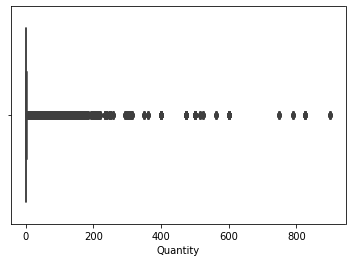

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



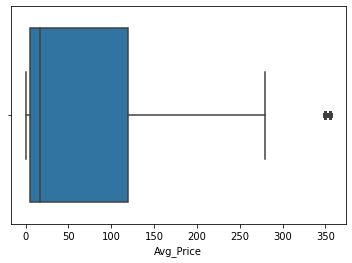

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



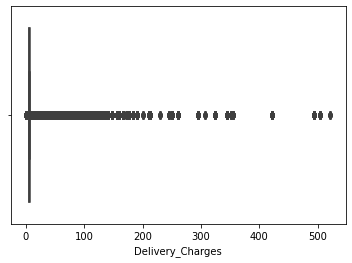

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



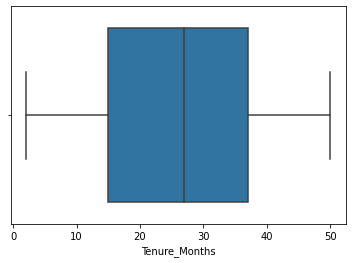

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



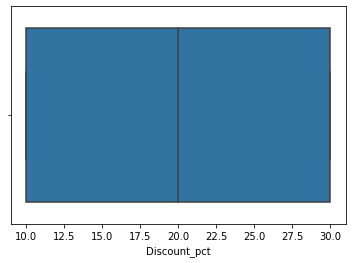

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



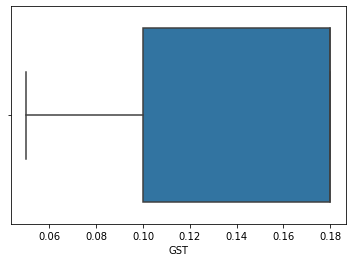

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



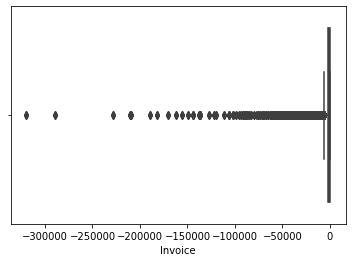

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



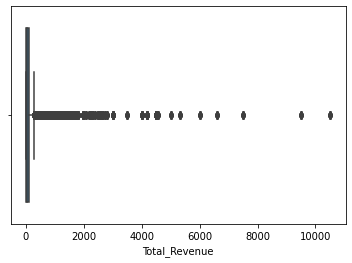

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



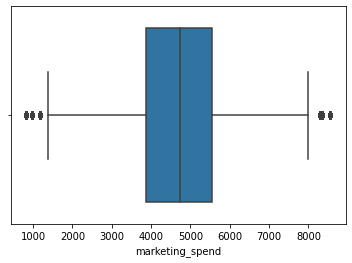

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



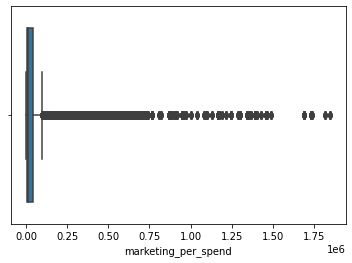

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



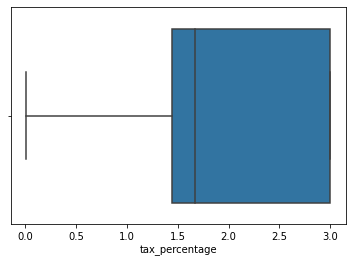

In [ ]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.pause(0.05)

In [90]:
# Outlier treatment
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.90), lower =x.quantile(0.10) )
    return x

In [91]:
df_num=df_num.apply(lambda x: outlier_capping(x))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



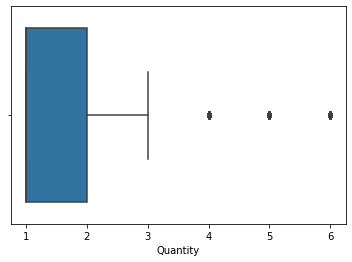

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



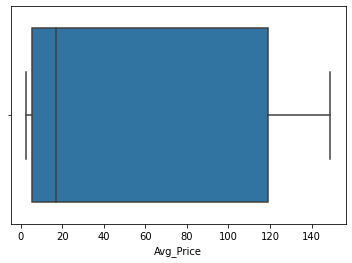

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



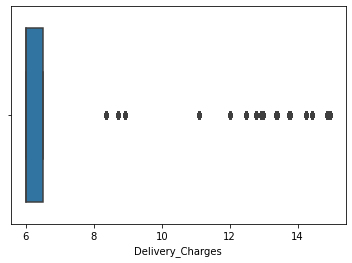

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



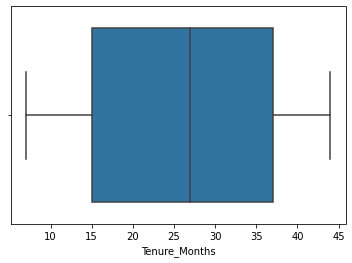

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



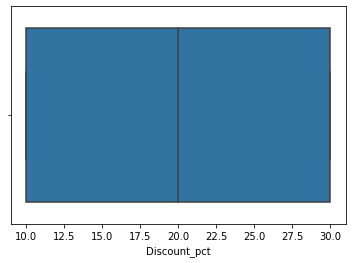

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



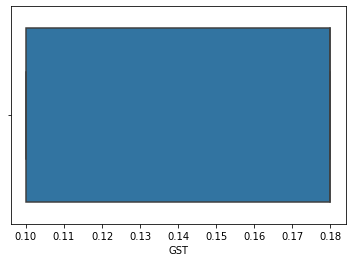

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



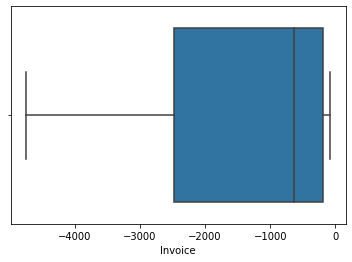

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



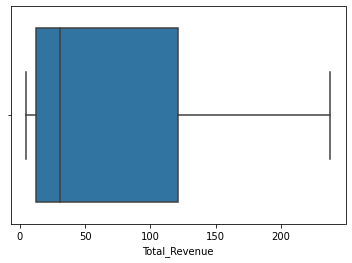

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



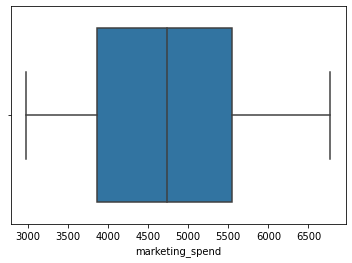

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



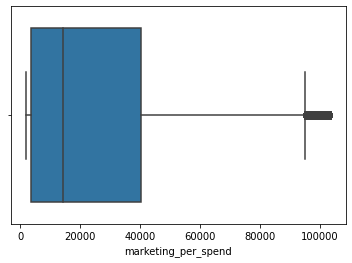

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



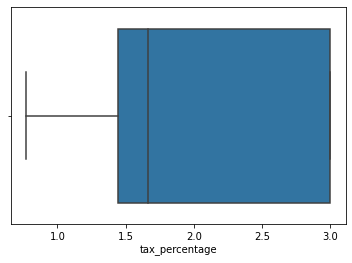

In [ ]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.pause(0.05)
    

In [92]:
df_num['CustomerID']=df_model['CustomerID']
df_num['Customer_LV']=df_model['Customer_LV']
df_num['Transaction_Date']=df_model['Transaction_Date']
df_num['Transaction_ID']=df_model['Transaction_ID']

In [93]:
df_num.head()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,GST,Invoice,Total_Revenue,marketing_spend,marketing_per_spend,tax_percentage,Customer_LV
0,17850,16679,2019-01-01,1.0,149.0,6.5,12.0,10.0,0.1,-1515.229,153.71,6771.55,4504.911847,1.538462,High Value
1,17850,16679,2019-01-01,1.0,149.0,6.5,12.0,20.0,0.1,-3206.039,153.71,6771.55,4504.911847,1.538462,High Value
2,17850,16679,2019-01-01,1.0,149.0,6.5,12.0,30.0,0.1,-4747.100,153.71,6771.55,4504.911847,1.538462,High Value
3,17850,16679,2019-01-01,1.0,149.0,6.5,12.0,10.0,0.1,-1515.229,153.71,6771.55,4504.911847,1.538462,High Value
4,17850,16679,2019-01-01,1.0,149.0,6.5,12.0,20.0,0.1,-3206.039,153.71,6771.55,4504.911847,1.538462,High Value


In [94]:
df_final=pd.concat([df_num,dummies], axis=1)

In [95]:
df_final.isnull().sum()

CustomerID                               0
Transaction_ID                           0
Transaction_Date                         0
Quantity                                 0
Avg_Price                                0
Delivery_Charges                         0
Tenure_Months                            0
Discount_pct                             0
GST                                      0
Invoice                                  0
Total_Revenue                            0
marketing_spend                          0
marketing_per_spend                      0
tax_percentage                           0
Customer_LV                              0
Product_Category_Accessories             0
Product_Category_Android                 0
Product_Category_Apparel                 0
Product_Category_Backpacks               0
Product_Category_Bags                    0
Product_Category_Bottles                 0
Product_Category_Drinkware               0
Product_Category_Fun                     0
Product_Cat

In [96]:
df_final.shape

(630688, 57)

In [97]:
#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 


#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [98]:
df_final['Customer_LifeValue']=np.where(df_final['Customer_LV']=='High Value',1, np.where(df_final['Customer_LV']=='Medium Value',2,3))

In [99]:
df_final.drop('Customer_LV',axis=1,inplace=True)

In [100]:
df_final['Customer_LifeValue'].value_counts()

2    220082
1    208879
3    201727
Name: Customer_LifeValue, dtype: int64

In [ ]:
df_final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Quantity',
       'Avg_Price', 'Delivery_Charges', 'Tenure_Months', 'Discount_pct', 'GST',
       'Invoice', 'Total_Revenue', 'marketing_spend', 'marketing_per_spend',
       'tax_percentage', 'Product_Category_Accessories',
       'Product_Category_Android', 'Product_Category_Apparel',
       'Product_Category_Backpacks', 'Product_Category_Bags',
       'Product_Category_Bottles', 'Product_Category_Drinkware',
       'Product_Category_Fun', 'Product_Category_Gift Cards',
       'Product_Category_Google', 'Product_Category_Headgear',
       'Product_Category_Housewares', 'Product_Category_Lifestyle',
       'Product_Category_More Bags', 'Product_Category_Nest',
       'Product_Category_Nest-Canada', 'Product_Category_Nest-USA',
       'Product_Category_Notebooks & Journals', 'Product_Category_Office',
       'Product_Category_Waze', 'Coupon_Status_Clicked',
       'Coupon_Status_Not Used', 'Coupon_Status_Used', 'Location_Calif

In [101]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [102]:
X=df_final.drop('Customer_LifeValue',axis=1)
y=df_final['Customer_LifeValue']

Defining X and Y variables for Model

In [ ]:
imp_vars_SKB

In [ ]:
##Relative Feature Importance

In [103]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state = 123 )

In [ ]:
clf_tree=RandomForestClassifier(max_depth=4,max_features=4,max_leaf_nodes=5)
clf_tree.fit(train_X,train_y)

RandomForestClassifier(max_depth=4, max_features=4, max_leaf_nodes=5)

In [ ]:
clf_tree.feature_importances_

array([1.53570933e-02, 1.80562398e-01, 7.69748690e-03, 0.00000000e+00,
       3.75590444e-04, 3.22533067e-02, 1.22903927e-01, 2.35807619e-01,
       1.11118408e-03, 1.74162168e-01, 5.99739005e-02, 2.23129575e-05,
       4.57147356e-04, 0.00000000e+00, 4.58264504e-02, 0.00000000e+00,
       1.19413541e-03, 3.48794347e-04, 3.70783392e-03, 0.00000000e+00,
       1.17322642e-04, 2.46225447e-06, 2.98508559e-03, 1.32449512e-04,
       1.33644680e-02, 0.00000000e+00, 1.71109637e-02, 1.55627501e-03,
       5.82888905e-02, 2.15142493e-05, 1.80442718e-02, 1.71361676e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.84646406e-04, 8.96195234e-04, 1.37738744e-05,
       2.00757003e-05, 2.66952475e-03, 0.00000000e+00, 3.25568934e-04,
       1.81527896e-05, 7.39495072e-04, 7.98071873e-06, 2.59185215e-05,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
import itertools
feature_map=[(i,v) for i, v in itertools.zip_longest(train_X.columns,clf_tree.feature_importances_)]
feature_map

[('Quantity', 0.015357093283426076),
 ('Avg_Price', 0.18056239751416678),
 ('Delivery_Charges', 0.007697486904380443),
 ('Tenure_Months', 0.0),
 ('Discount_pct', 0.00037559044359243587),
 ('GST', 0.03225330672025382),
 ('Invoice', 0.12290392712326666),
 ('Total_Revenue', 0.235807618907217),
 ('marketing_spend', 0.0011111840778460726),
 ('marketing_per_spend', 0.17416216815019633),
 ('tax_percentage', 0.059973900452155705),
 ('CustomerID', 2.231295754965582e-05),
 ('Product_Category_Accessories', 0.00045714735623180575),
 ('Product_Category_Android', 0.0),
 ('Product_Category_Apparel', 0.045826450423362815),
 ('Product_Category_Backpacks', 0.0),
 ('Product_Category_Bags', 0.001194135413008362),
 ('Product_Category_Bottles', 0.0003487943465581651),
 ('Product_Category_Drinkware', 0.0037078339238364602),
 ('Product_Category_Fun', 0.0),
 ('Product_Category_Gift Cards', 0.0001173226419263007),
 ('Product_Category_Google', 2.4622544733210645e-06),
 ('Product_Category_Headgear', 0.00298508559

In [ ]:
Feature_importance=pd.DataFrame(feature_map, columns=['Feature','Importance'])
Feature_importance.sort_values('Importance',inplace=True,ascending=False)
Feature_importance.head(15)

,Feature,Importance
7,Total_Revenue,0.235808
1,Avg_Price,0.180562
9,marketing_per_spend,0.174162
6,Invoice,0.122904
10,tax_percentage,0.059974
28,Product_Category_Nest-USA,0.058289
14,Product_Category_Apparel,0.045826
5,GST,0.032253
30,Product_Category_Office,0.018044
26,Product_Category_Nest,0.017111


In [ ]:
# Important Features from SKB

#['Quantity',
 #'Avg_Price',
 #'Delivery_Charges',
 #'GST',
 #'Invoice',
 #'Total_Revenue',
 #'marketing_per_spend',
 #'tax_percentage',
 #'Product_Category_Apparel',
 #'Product_Category_Drinkware',
 #'Product_Category_Lifestyle',
 #'Product_Category_Nest',
 #'Product_Category_Nest-Canada',
 #'Product_Category_Nest-USA',
 #'Product_Category_Office']


 # Important Features from Random Forests

#Uncommon features:'marketing_per_spend','Product_Category_Bags','Product_Category_Waze','Invoice',

final_model=df_final[['Avg_Price',	
'Total_Revenue',	
'Product_Category_Nest-USA',	
'GST',
'tax_percentage',
'Product_Category_Apparel',	
'Quantity',	
'Product_Category_Office',	
'Product_Category_Lifestyle',	
'Delivery_Charges',	
'Product_Category_Nest-Canada','Customer_LifeValue']]

In [ ]:
final_model.columns

Index(['Avg_Price', 'Total_Revenue', 'Product_Category_Nest-USA', 'GST',
       'tax_percentage', 'Product_Category_Apparel', 'Quantity',
       'Product_Category_Office', 'Product_Category_Lifestyle',
       'Delivery_Charges', 'Product_Category_Nest-Canada',
       'Customer_LifeValue'],
      dtype='object')

In [ ]:
final_X=final_model.drop('Customer_LifeValue',axis=1)
final_y=final_model['Customer_LifeValue']

In [ ]:
final_X.shape,final_y.shape

((630688, 11), (630688,))

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(final_X,final_y, test_size = 0.2,random_state = 123 )

In [ ]:
train_X.shape

(504550, 11)

In [ ]:
test_X.shape

(126138, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Build the model
model = LogisticRegression()
model = model.fit(train_X, train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Train predict
rftrain=model.predict(train_X)
# Test predict
rftest=model.predict(test_X)

In [ ]:
print(metrics.classification_report(train_y, rftrain))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98    167136
           2       0.97      0.95      0.96    176084
           3       0.98      0.98      0.98    161330

    accuracy                           0.97    504550
   macro avg       0.97      0.97      0.97    504550
weighted avg       0.97      0.97      0.97    504550



In [ ]:
print(metrics.classification_report(test_y, rftest))

              precision    recall  f1-score   support

           1       0.97      0.99      0.98     41743
           2       0.97      0.95      0.96     43998
           3       0.98      0.98      0.98     40397

    accuracy                           0.97    126138
   macro avg       0.97      0.97      0.97    126138
weighted avg       0.97      0.97      0.97    126138



Overall 96% accuracy on both test and train dataset 


# 3. CROSS SELLING-MARKET BASKET ANALYSIS
Cross-Selling (Which products are selling together

In [ ]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Qty')

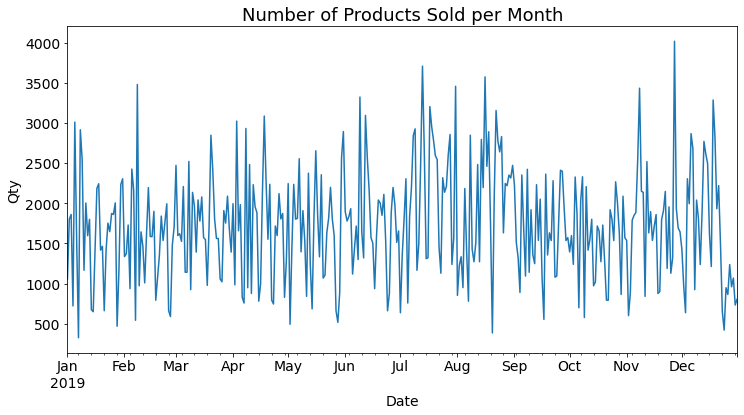

In [ ]:
#average no. of products sold every month

df1[['Transaction_Date','Product_Description']].groupby('Transaction_Date').count()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Products Sold per Month', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

In [ ]:
#Item_qty dataframe shows the number of items in each shopping transcation on different dates.
# For eg: customer id on the 12th index shows that he/she bought 4 items on 6th feb 2018.

item_qty = df1[['CustomerID', 'Transaction_Date','Quantity']]\
.groupby(['CustomerID','Transaction_Date']).count().reset_index()
item_qty

,CustomerID,Transaction_Date,Quantity
0,12346,2019-09-15,24
1,12347,2019-01-11,48
2,12347,2019-02-11,300
3,12347,2019-03-24,361
4,12348,2019-06-22,204
...,...,...,...
3203,18269,2019-05-04,84
3204,18269,2019-06-20,12
3205,18277,2019-10-23,12
3206,18283,2019-07-29,673


In [ ]:
item_qty.Quantity.mean()

The average no. of shopping items per customer is around 196

Text(0.5, 1.0, 'Histogram of Product Quantities per Shopping')

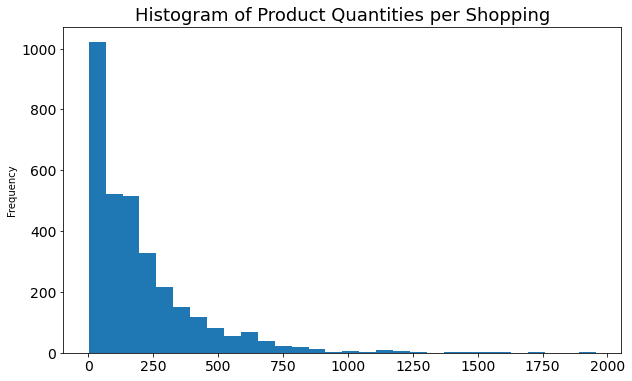

In [ ]:
item_qty.Quantity.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14, bins=30)
plt.title('Histogram of Product Quantities per Shopping', fontsize=18)

Customers are most likely to buy 100-200 items together

In [ ]:
items = df1.groupby(['CustomerID', 'Transaction_Date'])\
.agg({'Product_Description': lambda x: x.ravel().tolist()}).reset_index()
items.head(20)

,CustomerID,Transaction_Date,Product_Description
0,12346,2019-09-15,[Android Men's Engineer Short Sleeve Tee Charc...
1,12347,2019-01-11,"[Google Doodle Decal, Google Doodle Decal, Goo..."
2,12347,2019-02-11,[Nest Learning Thermostat 3rd Gen-USA - Copper...
3,12347,2019-03-24,"[Foam Can and Bottle Cooler, Foam Can and Bott..."
4,12348,2019-06-22,"[Sport Bag, Sport Bag, Red Shine 15 oz Mug, Re..."
5,12348,2019-10-19,"[Sport Bag, Sport Bag, Sport Bag, Sport Bag, S..."
6,12350,2019-12-14,"[Google Snapback Black Cap, Google Snapback Bl..."
7,12356,2019-09-15,"[Red Shine 15 oz Mug, Red Shine 15 oz Mug, Red..."
8,12359,2019-08-23,"[Google Women's Scoop Neck Tee White, Google W..."
9,12370,2019-05-26,"[Google Men's Short Sleeve Badge Tee Charcoal,..."


In [ ]:
import itertools  

In [ ]:
list(itertools.combinations(items.Product_Description[0], 2))

[("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's Engineer Short Sleeve Tee Charcoal",
  "Android Men's Engineer Short Sleeve Tee Charcoal"),
 ("Android Men's En

In [ ]:
combinations_list = []
for row in items.Product_Description:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

In [ ]:
combination_counts.value_counts()[:15]

From the above analysis, it is clear that customers are buying thermostats and security cameras  together along with items liks white battery alarm. More items can be seen being purchased together by expanding the range.

# 4. Predicting Next Purchase Day 
# (How soon each customer can visit the store 0-30 days, 30-60 days etc)

In [104]:
df_final.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Quantity',
       'Avg_Price', 'Delivery_Charges', 'Tenure_Months', 'Discount_pct', 'GST',
       'Invoice', 'Total_Revenue', 'marketing_spend', 'marketing_per_spend',
       'tax_percentage', 'Product_Category_Accessories',
       'Product_Category_Android', 'Product_Category_Apparel',
       'Product_Category_Backpacks', 'Product_Category_Bags',
       'Product_Category_Bottles', 'Product_Category_Drinkware',
       'Product_Category_Fun', 'Product_Category_Gift Cards',
       'Product_Category_Google', 'Product_Category_Headgear',
       'Product_Category_Housewares', 'Product_Category_Lifestyle',
       'Product_Category_More Bags', 'Product_Category_Nest',
       'Product_Category_Nest-Canada', 'Product_Category_Nest-USA',
       'Product_Category_Notebooks & Journals', 'Product_Category_Office',
       'Product_Category_Waze', 'Coupon_Status_Clicked',
       'Coupon_Status_Not Used', 'Coupon_Status_Used', 'Location_Calif

In [105]:
# taking all the features from the previous classification model

final_features=df_final[['CustomerID','Transaction_ID','Transaction_Date','Avg_Price', 'Total_Revenue', 'Product_Category_Nest-USA', 'GST',
       'tax_percentage', 'Product_Category_Apparel', 'Quantity',
       'Product_Category_Office', 'Product_Category_Lifestyle',
       'Delivery_Charges', 'Product_Category_Nest-Canada',
       'Customer_LifeValue']]

In [106]:
final_features.head()

,CustomerID,Transaction_ID,Transaction_Date,Avg_Price,Total_Revenue,Product_Category_Nest-USA,GST,tax_percentage,Product_Category_Apparel,Quantity,Product_Category_Office,Product_Category_Lifestyle,Delivery_Charges,Product_Category_Nest-Canada,Customer_LifeValue
0,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1
1,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1
2,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1
3,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1
4,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1


In [107]:
df4=final_features.groupby(['CustomerID','Transaction_Date'])[['Transaction_ID']].count().reset_index()

In [108]:
df4=df4.rename(columns={'Transaction_ID':'No_of_Trans'})
df4

,CustomerID,Transaction_Date,No_of_Trans
0,12346,2019-09-15,24
1,12347,2019-01-11,48
2,12347,2019-02-11,300
3,12347,2019-03-24,361
4,12348,2019-06-22,204
...,...,...,...
3203,18269,2019-05-04,84
3204,18269,2019-06-20,12
3205,18277,2019-10-23,12
3206,18283,2019-07-29,673


In [111]:
df5=df4.groupby(['CustomerID','No_of_Trans'])[['Transaction_Date']].min().reset_index()
df5=df5.rename(columns={'Transaction_Date':'MinTransDate'})
df5

,CustomerID,No_of_Trans,MinTransDate
0,12346,24,2019-09-15
1,12347,48,2019-01-11
2,12347,300,2019-02-11
3,12347,361,2019-03-24
4,12348,72,2019-10-19
...,...,...,...
2990,18269,12,2019-06-20
2991,18269,84,2019-05-04
2992,18277,12,2019-10-23
2993,18283,540,2019-10-10


In [113]:
df6=df4.groupby(['CustomerID'])[['Transaction_Date']].max().reset_index()
df6=df6.rename(columns={'Transaction_Date':'MaxTransDate'})
df6

,CustomerID,MaxTransDate
0,12346,2019-09-15
1,12347,2019-03-24
2,12348,2019-10-19
3,12350,2019-12-14
4,12356,2019-09-15
...,...,...
1463,18259,2019-05-04
1464,18260,2019-11-08
1465,18269,2019-06-20
1466,18277,2019-10-23


In [114]:
df7=pd.merge(left=df5, right=df6, how='left', on=['CustomerID'])
df7

,CustomerID,No_of_Trans,MinTransDate,MaxTransDate
0,12346,24,2019-09-15,2019-09-15
1,12347,48,2019-01-11,2019-03-24
2,12347,300,2019-02-11,2019-03-24
3,12347,361,2019-03-24,2019-03-24
4,12348,72,2019-10-19,2019-10-19
...,...,...,...,...
2990,18269,12,2019-06-20,2019-06-20
2991,18269,84,2019-05-04,2019-06-20
2992,18277,12,2019-10-23,2019-10-23
2993,18283,540,2019-10-10,2019-10-10


In [115]:
data=pd.merge(left=final_features, right= df7, how="left", on=['CustomerID'])
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Avg_Price,Total_Revenue,Product_Category_Nest-USA,GST,tax_percentage,Product_Category_Apparel,Quantity,Product_Category_Office,Product_Category_Lifestyle,Delivery_Charges,Product_Category_Nest-Canada,Customer_LifeValue,No_of_Trans,MinTransDate,MaxTransDate
0,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,24,2019-01-21,2019-04-01
1,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,96,2019-01-16,2019-04-01
2,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,228,2019-04-01,2019-04-01
3,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,240,2019-03-01,2019-04-01
4,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,408,2019-01-26,2019-04-01


In [116]:
data['Tenure']=data['MaxTransDate']-data['MinTransDate']

In [117]:
data.head()

,CustomerID,Transaction_ID,Transaction_Date,Avg_Price,Total_Revenue,Product_Category_Nest-USA,GST,tax_percentage,Product_Category_Apparel,Quantity,Product_Category_Office,Product_Category_Lifestyle,Delivery_Charges,Product_Category_Nest-Canada,Customer_LifeValue,No_of_Trans,MinTransDate,MaxTransDate,Tenure
0,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,24,2019-01-21,2019-04-01,70 days
1,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,96,2019-01-16,2019-04-01,75 days
2,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,228,2019-04-01,2019-04-01,0 days
3,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,240,2019-03-01,2019-04-01,31 days
4,17850,16679,2019-01-01,149.0,153.71,1,0.1,1.538462,0,1.0,0,0,6.5,0,1,408,2019-01-26,2019-04-01,65 days


In [118]:
data['Avg_days_per_trans']=data['Tenure']/data['No_of_Trans']

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576399 entries, 0 to 2576398
Data columns (total 20 columns):
 #   Column                        Dtype          
---  ------                        -----          
 0   CustomerID                    int64          
 1   Transaction_ID                int64          
 2   Transaction_Date              datetime64[ns] 
 3   Avg_Price                     float64        
 4   Total_Revenue                 float64        
 5   Product_Category_Nest-USA     uint8          
 6   GST                           float64        
 7   tax_percentage                float64        
 8   Product_Category_Apparel      uint8          
 9   Quantity                      float64        
 10  Product_Category_Office       uint8          
 11  Product_Category_Lifestyle    uint8          
 12  Delivery_Charges              float64        
 13  Product_Category_Nest-Canada  uint8          
 14  Customer_LifeValue            int64          
 15  No_of_Trans    

In [120]:
data['Avg_days_per_trans']=data['Avg_days_per_trans'].astype(str)

In [121]:
import re
import string

In [122]:
data['Avg_days_per_trans']=data['Avg_days_per_trans'].str.extract('(\d+)')

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576399 entries, 0 to 2576398
Data columns (total 20 columns):
 #   Column                        Dtype          
---  ------                        -----          
 0   CustomerID                    int64          
 1   Transaction_ID                int64          
 2   Transaction_Date              datetime64[ns] 
 3   Avg_Price                     float64        
 4   Total_Revenue                 float64        
 5   Product_Category_Nest-USA     uint8          
 6   GST                           float64        
 7   tax_percentage                float64        
 8   Product_Category_Apparel      uint8          
 9   Quantity                      float64        
 10  Product_Category_Office       uint8          
 11  Product_Category_Lifestyle    uint8          
 12  Delivery_Charges              float64        
 13  Product_Category_Nest-Canada  uint8          
 14  Customer_LifeValue            int64          
 15  No_of_Trans    

In [140]:
data_model['Avg_days_per_trans'].value_counts()

0      1930746
1       263404
3        95268
2        74957
4        43981
5        29225
7        21402
6        14441
21       12747
25       11805
9        11229
8         8333
27        8131
22        5657
13        5617
11        4236
15        4045
17        3865
12        3853
20        3689
18        3457
10        3037
28        3036
19        2916
26        1968
14        1836
16        1753
23        1572
117        193
Name: Avg_days_per_trans, dtype: int64

In [125]:
data['Avg_days_per_trans']=data['Avg_days_per_trans'].astype(int)

In [196]:
data.drop(['MinTransDate','MaxTransDate','Tenure'],axis=1,inplace=True)

In [153]:
data["next_pur_day"]=np.where(data["Avg_days_per_trans"]<=10, 1, np.where(data["Avg_days_per_trans"]<=20,2,np.where(data["Avg_days_per_trans"]<=30,3 ,4)))

The maximum customer group that visits the store is in 0-30 days. 

In [197]:
data['next_pur_day'].value_counts()

1    2496023
3      44916
2      35267
4        193
Name: next_pur_day, dtype: int64

Group 1: 0-10 days
Group 2: 10-20 days
Group 3: 20-30 days
Group 4: More than 30 days

In [198]:
data_model=data.drop(['CustomerID','Transaction_ID','Transaction_Date'],axis=1)

In [199]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2576399 entries, 0 to 2576398
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Avg_Price                     float64
 1   Total_Revenue                 float64
 2   Product_Category_Nest-USA     uint8  
 3   GST                           float64
 4   tax_percentage                float64
 5   Product_Category_Apparel      uint8  
 6   Quantity                      float64
 7   Product_Category_Office       uint8  
 8   Product_Category_Lifestyle    uint8  
 9   Delivery_Charges              float64
 10  Product_Category_Nest-Canada  uint8  
 11  Customer_LifeValue            int64  
 12  No_of_Trans                   int64  
 13  Avg_days_per_trans            int64  
 14  next_pur_day                  int64  
dtypes: float64(6), int64(4), uint8(5)
memory usage: 293.0 MB


SINCE THIS IS AN UNBALANCED CLASS. WILL DO SMOTE SAMPLING TO BALANCE THE CLASSES

In [180]:
# SMOTE SAMPLING

import imblearn.over_sampling as over_sampling
from imblearn.over_sampling import SMOTE

In [200]:
X=data_model.drop('next_pur_day',axis=1)
y=data_model['next_pur_day']

In [201]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(x,y, test_size = 0.2,random_state = 123 )

In [202]:
train_X.shape

(2061119, 17)

In [203]:
test_X.shape

(515280, 17)

In [204]:
train_y.value_counts()

1    1996884
3      35938
2      28142
4        155
Name: next_pur_day, dtype: int64

In [206]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061119 entries, 2319317 to 773630
Data columns (total 17 columns):
 #   Column                        Dtype          
---  ------                        -----          
 0   Avg_Price                     float64        
 1   Total_Revenue                 float64        
 2   Product_Category_Nest-USA     uint8          
 3   GST                           float64        
 4   tax_percentage                float64        
 5   Product_Category_Apparel      uint8          
 6   Quantity                      float64        
 7   Product_Category_Office       uint8          
 8   Product_Category_Lifestyle    uint8          
 9   Delivery_Charges              float64        
 10  Product_Category_Nest-Canada  uint8          
 11  Customer_LifeValue            int64          
 12  No_of_Trans                   int64          
 13  MinTransDate                  datetime64[ns] 
 14  MaxTransDate                  datetime64[ns] 
 15  Tenure    

In [209]:
train_X.drop(['MinTransDate','MaxTransDate','Tenure'],axis=1,inplace=True)

In [217]:
train_X.drop(['No_of_Trans'],axis=1,inplace=True)

In [210]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061119 entries, 2319317 to 773630
Data columns (total 14 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Avg_Price                     float64
 1   Total_Revenue                 float64
 2   Product_Category_Nest-USA     uint8  
 3   GST                           float64
 4   tax_percentage                float64
 5   Product_Category_Apparel      uint8  
 6   Quantity                      float64
 7   Product_Category_Office       uint8  
 8   Product_Category_Lifestyle    uint8  
 9   Delivery_Charges              float64
 10  Product_Category_Nest-Canada  uint8  
 11  Customer_LifeValue            int64  
 12  No_of_Trans                   int64  
 13  Avg_days_per_trans            int64  
dtypes: float64(6), int64(3), uint8(5)
memory usage: 167.1 MB


In [211]:
sm = over_sampling.SMOTE(random_state=123)
train_X_multi, train_y_multi = sm.fit_resample(train_X.values,train_y.values)

In [212]:
train_X_multi.shape, train_y_multi.shape

((7987536, 14), (7987536,))

In [213]:
pd.Series(train_y_multi).value_counts()

1    1996884
3    1996884
2    1996884
4    1996884
dtype: int64

In [214]:
train_X_multi = pd.DataFrame(train_X_multi, columns = train_X.columns)
train_y_multi = pd.Series(train_y_multi, name = 'next_pur_day')

In [215]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [216]:
model_rfr=RandomForestClassifier().fit(train_X_multi, train_y_multi)

In [218]:
# Train predict
rftrain=model_rfr.predict(train_X_multi)

In [221]:
print(metrics.classification_report(train_y_multi, rftrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00   1996884
           2       1.00      1.00      1.00   1996884
           3       1.00      1.00      1.00   1996884
           4       1.00      1.00      1.00   1996884

    accuracy                           1.00   7987536
   macro avg       1.00      1.00      1.00   7987536
weighted avg       1.00      1.00      1.00   7987536



In [ ]:
print(metrics.classification_report(test_y, rftest))

# 5. Perform cohort analysis by defining below cohorts

In [ ]:
df2.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV', 'Recency',
       'Frequency', 'Monetary', 'seg', 'r_seg', 'm_seg', 'f_seg', 'fm_seg',
       'rfm_seg'],
      dtype='object')

###Cohort Analysis and Understanding Customer Behaviour

In [ ]:
cust=df2.groupby(['cust_purchase_month','CustomerID'])[['Transaction_ID']].count().reset_index()
cust

,cust_purchase_month,CustomerID,Transaction_ID
0,April,12429,240
1,April,12471,565
2,April,12474,84
3,April,12484,1143
4,April,12586,12
...,...,...,...
2715,September,18118,1188
2716,September,18190,12
2717,September,18212,505
2718,September,18223,384


In [ ]:
cust.CustomerID.nunique()


1468


There are a total of 1468 unique customers across these 12 cohorts/12 months

In [ ]:
cust=cust.sort_values('cust_purchase_month', key=lambda x: x.apply(lambda x: month_dic[x]))
cust=cust.rename(columns={'Transaction_ID':'No_of_Trans'})

In [ ]:
cust=cust.sort_values('No_of_Trans', ascending=False)
cust.head(15)

,cust_purchase_month,CustomerID,No_of_Trans
716,December,17337,3120
1113,January,17850,3052
14,April,12748,2886
1162,July,13081,1921
1277,July,15464,1851
1271,July,15311,1717
2318,October,12433,1682
2463,October,16222,1644
1665,March,13174,1621
1642,March,12501,1584


In [ ]:
cust.loc[cust['CustomerID']==17337]

,cust_purchase_month,CustomerID,No_of_Trans
716,December,17337,3120


These are the no. of transactions made per customer in each month/cohort. This level of analysis shows that individually customers have done the maximum no. of transactions in the months of March, April and December

In [ ]:
df2.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV', 'Recency',
       'Frequency', 'Monetary', 'seg', 'r_seg', 'm_seg', 'f_seg', 'fm_seg',
       'rfm_seg'],
      dtype='object')

In [ ]:
cust_revenue=df2.groupby(['cust_purchase_month'])[['Total_Revenue']].mean().reset_index()
cust_revenue.sort_values('Total_Revenue',ascending=False)

,cust_purchase_month,Total_Revenue
9,November,111.692340
2,December,104.529172
10,October,94.596865
4,January,93.017551
3,February,92.905816
11,September,91.280386
0,April,90.058571
8,May,84.719898
7,March,81.857072
6,June,81.638322


This is average revenue earned per month, with the highest in the winter months i.e. October, November and December. 

In [ ]:
cust_marketing_spend=df2.groupby(['cust_purchase_month'])[['marketing_spend']].mean().reset_index()
cust_marketing_spend.sort_values('marketing_spend',ascending=False)

,cust_purchase_month,marketing_spend
2,December,6484.160879
9,November,5449.200705
0,April,5224.655475
4,January,5057.552702
10,October,4944.887985
3,February,4926.269856
1,August,4699.307136
11,September,4496.326627
6,June,4482.258929
7,March,3974.476071


The maximum marketing spend is also happening in December and November, which in turn is increasing the revenue in these months as was suggested earlier.

In [ ]:
df2.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'Discount_pct', 'GST', 'Invoice',
       'Cust_Transaction_Date', 'oldest_cust_tran_dt', 'user_type',
       'cust_purchase_month', 'cust_purchase_week', 'cust_purchase_day',
       'num_user_type', 'Total_Revenue', 'marketing_spend',
       'marketing_per_spend', 'tax_percentage', 'Customer_LV', 'Recency',
       'Frequency', 'Monetary', 'seg', 'r_seg', 'm_seg', 'f_seg', 'fm_seg',
       'rfm_seg'],
      dtype='object')

In [ ]:
import seaborn as sns

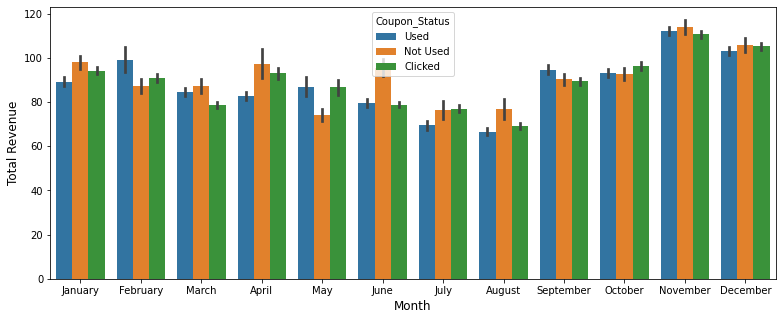

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(x = 'cust_purchase_month',y = 'Total_Revenue', data = df2, hue='Coupon_Status')
plt.xlabel('Month',size=12)
plt.ylabel('Total Revenue',size=12)
plt.show()

Again Months of October, November and December show that maximum no. of coupons were used and clicked by customers

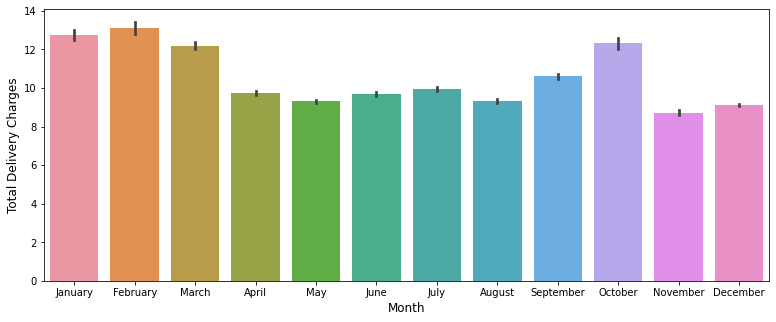

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(x = 'cust_purchase_month',y = 'Delivery_Charges', data = df2)
plt.xlabel('Month',size=12)
plt.ylabel('Total Delivery Charges',size=12)
plt.show()

Least amount of Delivery Charges are in November and December, since revenue was the highest in these months due to factors like more marketing campaigns and discount coupon offerings.

In [ ]:
df2.groupby(['cust_purchase_month','Customer_LV'])[['Quantity']].sum().reset_index().sort_values('Quantity')

,cust_purchase_month,Customer_LV,Quantity
7,December,Low Value,15690
10,February,Low Value,18859
13,January,Low Value,20774
1,April,Low Value,21752
22,March,Low Value,22954
28,November,Low Value,24398
25,May,Low Value,24861
34,September,Low Value,25485
19,June,Low Value,26019
31,October,Low Value,26245


1. Here we can see that Cohorts of October, November, December  and January in particular have low value customers with least amount of products purchased. That is Why, the marketing spend and other offers like coupons have been used specifically in these months to increase their revenue and make them High Valued Customers.

2. July has the maximum retention of customers and also the maximum quantity of products purchased and customers who are High Value.

### Customer Retention

In [ ]:
retention=df2.groupby(['cust_purchase_month'])[['CustomerID']].count().reset_index().sort_values('CustomerID', ascending=False)
retention

,cust_purchase_month,CustomerID
5,July,65854
1,August,62299
7,March,53463
9,November,53335
6,June,53023
8,May,51316
2,December,50943
0,April,50355
4,January,49796
11,September,49580


July has the maximum Retention followed by August suggesting that Summer Months customer sales are higher.